In [1]:
# !pip install igraph # for directed graph
# !pip install networkx

In [2]:
# import igraph as ig
import networkx as nx

In [3]:
import numpy as np
import sys
sys.path.append('..')
import umbrella_mesh
import linkage_vis
import load_jsondata
from configuration import parse_input

In [4]:
from figure_2D import plot_undeployed_2D
from tools import get_center_position

In [5]:
data_folder_path = './../../data/'
igloo_coars_path = './igloo_rum.json.gz' # 44
igloo_path = data_folder_path+'igloo.json.gz' # 57
squid_path = data_folder_path+'squidward_highres.json.gz' # 143
saddle_path = data_folder_path+'saddle_5t.json.gz' # 31
peanut_path = data_folder_path+'peanut_fp_low.json.gz' # 63


input_path = igloo_path

io, input_data, target_mesh, curr_um, plate_thickness_scaled, target_height_multiplier = parse_input(input_path, handleBoundary = False, isHex = False, use_target_surface = False)
# if `use_target_surface=True`, no need to activate any units

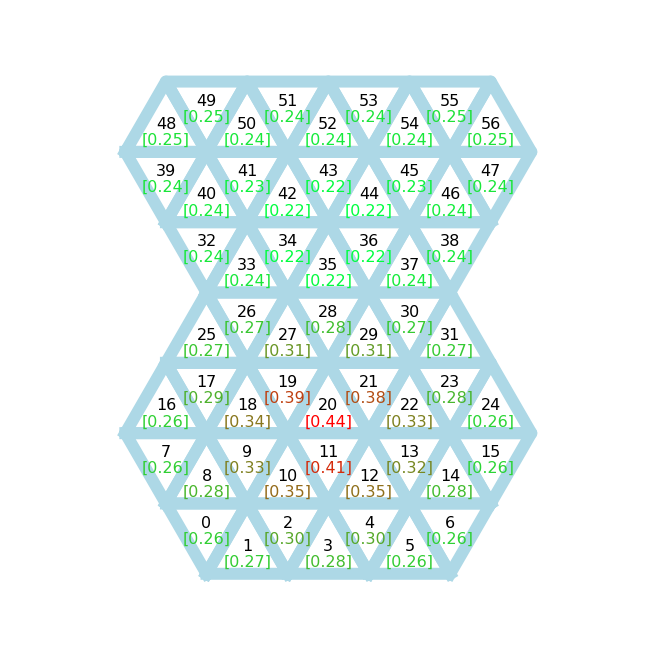

In [6]:
plot_undeployed_2D(input_data,
                   curr_um,
                   show_height=True,
                   show_plot=True)

In [7]:
init_center_pos = get_center_position(curr_um)
init_heights = curr_um.umbrellaHeights
connectivity = np.array(input_data['umbrella_connectivity'])

In [8]:
# init_center_pos[:,:2]

In [9]:
# init_center_pos, init_heights, input_data['umbrella_connectivity']

In [10]:
graph = nx.Graph()

In [11]:
height_as_node = []
for i,h in enumerate(init_heights):
    height_as_node.append((i,{'height': h}))
graph.add_nodes_from(height_as_node)

In [12]:
wighted_edge = []
for i,j in connectivity:
    wighted_edge.append((i,j,abs(curr_um.umbrellaHeights[i] - curr_um.umbrellaHeights[j])))
graph.add_weighted_edges_from(wighted_edge)

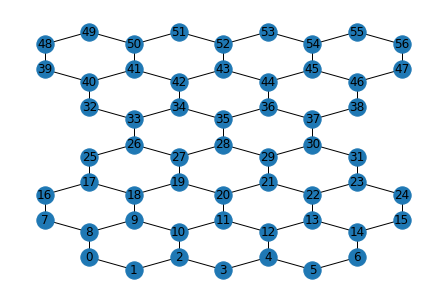

In [13]:
nx.draw(graph, pos=init_center_pos[:,:2], with_labels=True)

In [14]:
# graph.nodes.data()

In [15]:
def find_extrems(graph, drop_boudary=True, degree=3):
    bumps = []
    depression = []
    for node in graph.nodes:
        is_bump = True
        is_depression = True
        if drop_boudary and len(list(graph.neighbors(node)))<degree: continue
        for neighbor in graph.neighbors(node):
            if graph.nodes[neighbor]['height'] > graph.nodes[node]['height']: is_bump = False
            else : is_depression = False
        if (is_bump): bumps.append(node)
        elif (is_depression): depression.append(node)
    return bumps, depression

In [16]:
bumps, depressions = find_extrems(graph, drop_boudary=True)

In [17]:
bumps, depressions

([20], [36, 42])

In [18]:
print('bumps')
print(*[(b, init_heights[b]) for b in bumps], sep='\n')
print('\ndepression')
print(*[(d, init_heights[d]) for d in depressions], sep='\n')

bumps
(20, 0.442812788019624)

depression
(36, 0.22101628960369707)
(42, 0.22167415910420507)


In [19]:
def shortes_paths(graph, bumps, depressions):
    paths = []
    for b in bumps:
        shortest = []
        for d in depressions:
            shortest.append(nx.shortest_path(graph,source=b,target=d))
        lst = min(shortest, key=len)
        paths.append(lst)
    return paths

In [20]:
paths = shortes_paths(graph, bumps, depressions)
paths

[[20, 19, 27, 28, 35, 36]]

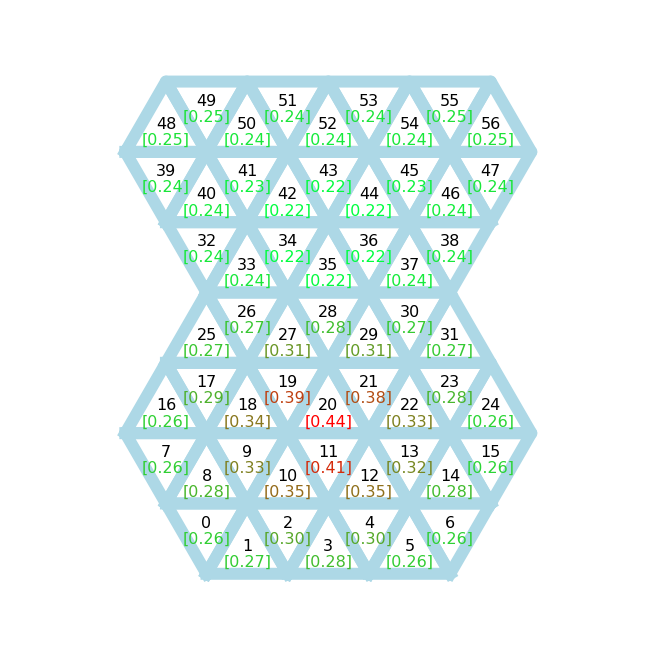

In [21]:
plot_undeployed_2D(input_data,
                   curr_um,
                   show_height=True,
                   show_plot=True)

In [22]:
bumps, depressions

([20], [36, 42])